# Data Science for Construction, Architecture and Engineering

### Section 4 - Operations - Pandas Statistics and Visualization

### Exercise Set 4.2 - Pandas Stats and Viz II

This set of exercises is related to the second half of Section 4 videos. Using the same data (ASBRAE Thermal Comfort Database II) and packages (Pandas) as in the videos, we will learn how to find specific values in different scenarios.

There is an introduction video available to explain the process of using this exercise video.

The lead developer of this exercise is Chun Fu, a Ph.D. student at NUS and a teaching assistant of this course. 

#### Setup the environment

Let's set up the environment and read the data first:

In [ ]:
# Import packages
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Set path for data source
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/4 - Operations - Statistics and Visualization/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Load thermal comfort database
ieq_data = pd.read_csv("ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

## Boxplot Example in Seaborn

Before we get into the exercises, let's look at an example of how we can use boxplots to compare distributions between different groups. In the figure below, we have created a visualization that shows the **Air temperature (C)** has significantly different distributions under different **Thermal sensation**.

For example, **Air temperature (C)** with the lowest **ThermalSensation_rounded** value (-3.0) has the distribution of lower values (seeing the boxplot body that covers 50% of the data).

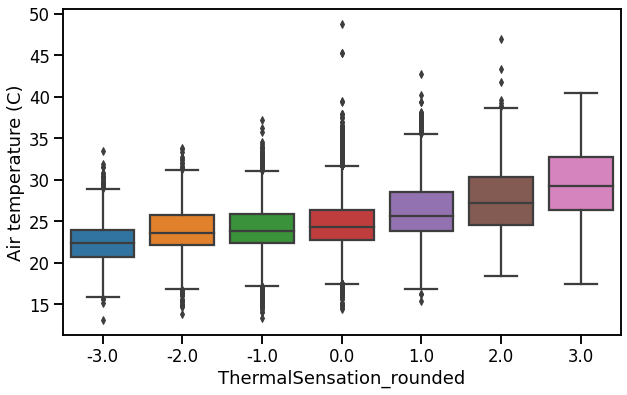

In [ ]:
# Boxplot for Air temperature (C) under different Thermal sensation
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.set_context('talk')
fig.set_facecolor('white')
sns.boxplot(x="ThermalSensation_rounded", y="Air temperature (C)", data=ieq_data)

## Exercise 04.2.1 -- Which country has the lowest median relative humidity?

After the example shown above, you should be more familiar with how to use boxplot in Seaborn package! 

Now, imagine you are an environmental researcher who mainly studies **humidity conditions** of our surrounding environments, especially focusing on where the **lowest** relative humidity happens.

So, in our first exercise, let's begin with considering only one variable (or column) - **Country**. In terms of **median**, find the country with the lowest **Relative humidity (%)**, according to the dataset (for example, **Singapore** could be one of possible answers).

 You are encouraged to draw boxplots of **Relative humidity (%)** for each of the different **Country**, just like the example we demonstrated.

**Note**: All measurements in `ASHRAE Thermal Comfort Database II` were collected from field experiments research projects, including indoor and outdoor environments, so they might not represent the local climate or general indoor condition.

In [ ]:
ieq_data.columns

Index(['Publication (Citation)', 'Year', 'Season', 'Climate', 'City',
       'Country', 'Building type', 'Cooling startegy_building level', 'Sex',
       'Thermal sensation', 'Clo', 'Met', 'Air temperature (C)',
       'Relative humidity (%)', 'Air velocity (m/s)',
       'ThermalSensation_rounded'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

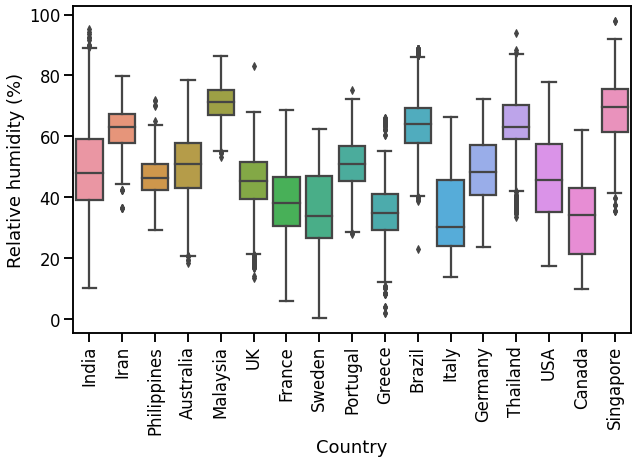

In [ ]:
# Try to use the seaborn example from above. If the x-axis labels are too hard to read, try to adjust the parameters in set_size_inches() or switch X and Y axis
# YOUR CODE HERE 
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.set_context('talk')
fig.set_facecolor('white')
sns.boxplot(x="Country", y="Relative humidity (%)", data=ieq_data)
plt.xticks(rotation=90)

In [ ]:
ieq_data[['Relative humidity (%)', 'Country']].groupby('Country').median().sort_values(by='Relative humidity (%)', ascending=True)

Relative humidity (%)
Country                           
Italy                        30.40
Sweden                       33.95
Canada                       34.10
Greece                       34.90
France                       38.10
UK                           45.50
USA                          45.70
Philippines                  46.20
India                        48.00
Germany                      48.20
Australia                    50.80
Portugal                     51.10
Iran                         63.00
Thailand                     63.20
Brazil                       64.00
Singapore                    69.70
Malaysia                     71.30

## Exercise 04.2.2 - Which country and season has the lowest median relative humidity?

In 4.2.1, we got the lowest median relative humidity among different countries. However, the distribution of humidity is also strongly affected by different seasons. Therefore, in this exercise, please consider both **Country** and **Season** at the same time to find the lowest median **Relative humidity (%)**.

Find the country and season with the lowest **median** **Relative humidity (%)** (for example, **Singapore-Summer** could be one of possible answers).

In [ ]:
# If the x-axis labels are too hard to read, try to adjust the parameters in set_size_inches() or switch X and Y axis
# YOUR CODE HERE
Humd_by_Country_Season = ieq_data[['Relative humidity (%)', 'Country', 'Season']].groupby(['Country', 'Season']).median().sort_values(by='Relative humidity (%)', ascending=True)
Humd_by_Country_Season.idxmin()

Relative humidity (%)    (Sweden, Winter)
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

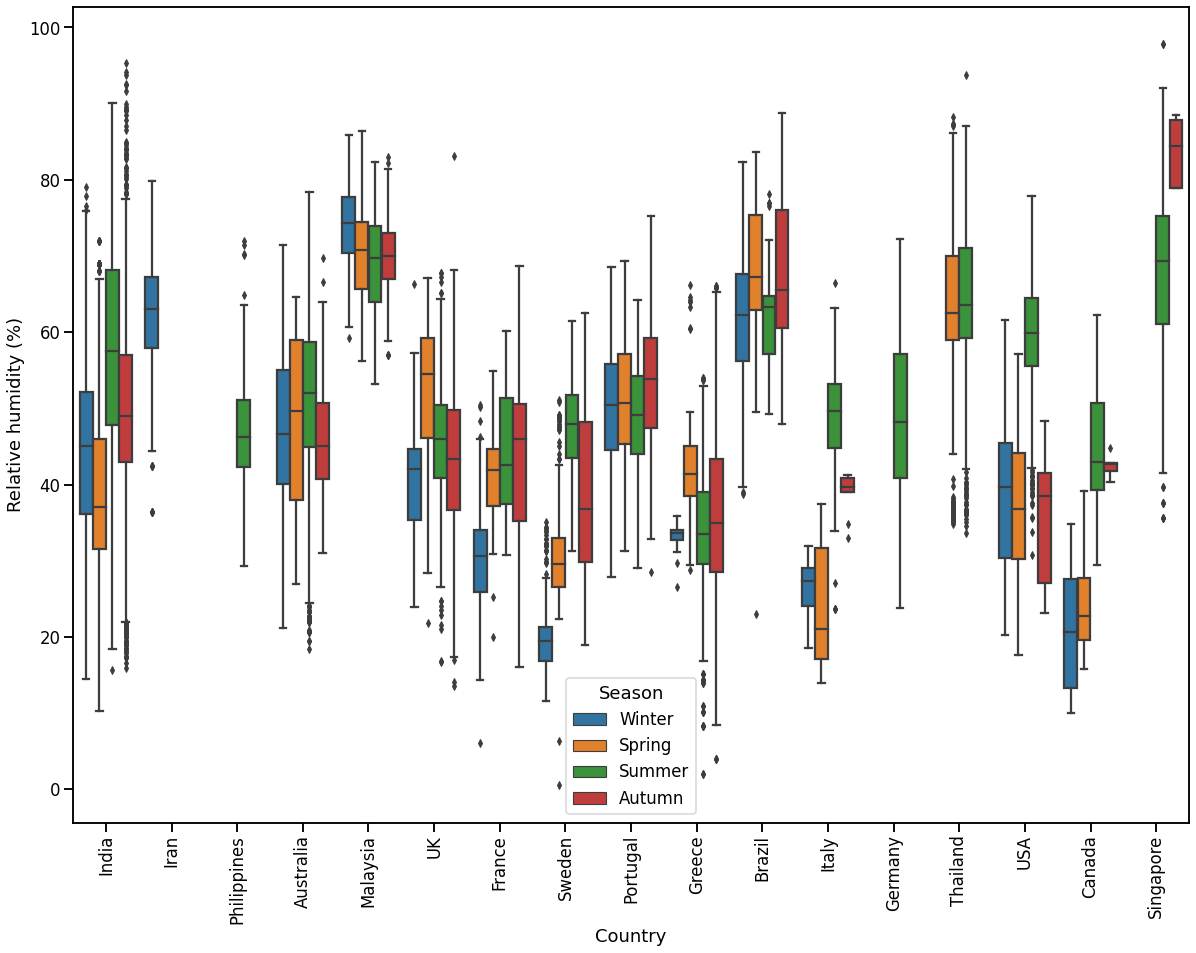

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,15)
sns.set_context('talk')
fig.set_facecolor('white')
sns.boxplot(x="Country", y="Relative humidity (%)", hue="Season", data=ieq_data)
plt.xticks(rotation=90)

## Exercise 04.2.3 - Which country, season, and building type, has the lowest median relative humidity? - Advanced

Based on the problems above, we can get the minimum relative humidity by taking into account both the **Country** and the **Season**. However, **Building type** is also an important factor influencing the indoor environment, and we should consider this as well. In addition, some subsets in the `ASHRAE Thermal Comfort Database II` have rows with incomplete data that might not give a reliable result, so they should be removed.

So, in this exercise, we want to (1) consider three conditions at the same time: **Country**, **Season** and **Building type**, and (2) **remove the subset with less than 100 rows** (e.g., the subset Sweden-Winter-Classroom with only 54 data rows should be removed).

Find the **Country**, **Season**, and **Building type** with the lowest `median` **Relative humidity (%)**

Please provide the answer in the following format: "country-season-building type", with the first letter capitalized, for example, **Singapore-Summer-Office**

In [ ]:
ieq_data.head()

Publication (Citation)  ...  ThermalSensation_rounded
2233  Indraganti, Madhavi, et al. "Adaptive model of...  ...                      -2.0
2234  Indraganti, Madhavi, et al. "Adaptive model of...  ...                      -1.0
2235  Indraganti, Madhavi, et al. "Adaptive model of...  ...                      -2.0
2236  Indraganti, Madhavi, et al. "Adaptive model of...  ...                      -2.0
2237  Indraganti, Madhavi, et al. "Adaptive model of...  ...                       0.0

[5 rows x 16 columns]

In [ ]:
# Create a dataframe of counts by using groupby(by=['var1','var2','var3']), and put list of variables as parameter in function
# YOUR CODE HERE
conditions = ['Country', 'Season', 'Building type']
df_conditions = ieq_data[['Country', 'Season', 'Building type', 'Relative humidity (%)']].groupby(conditions)


In [ ]:
df_conditions.count()

Relative humidity (%)
Country   Season Building type                       
Australia Autumn Office                           234
                 Senior center                     44
          Spring Senior center                     45
          Summer Office                          4998
                 Senior center                    206
...                                               ...
UK        Winter Others                           245
USA       Autumn Office                           121
          Spring Office                           718
          Summer Office                          1124
          Winter Office                           987

[102 rows x 1 columns]

In [ ]:
counts = df_conditions.count()
counts.rename(columns={"Relative humidity (%)": "Count"}, inplace=True)

In [ ]:
# Create a dataframe of medians by using groupby(by=listOfVariable), where listOfVariable is a list of variable names
# YOUR CODE HERE
cond_median = ieq_data[['Country', 'Season', 'Building type', 'Relative humidity (%)']].groupby(conditions).median()
cond_median

Relative humidity (%)
Country   Season Building type                       
Australia Autumn Office                         47.55
                 Senior center                  36.45
          Spring Senior center                  49.60
          Summer Office                         51.80
                 Senior center                  54.30
...                                               ...
UK        Winter Others                         42.00
USA       Autumn Office                         38.50
          Spring Office                         36.75
          Summer Office                         59.90
          Winter Office                         39.70

[102 rows x 1 columns]

In [ ]:
# Use dataframe of counts as filter (keep subsets with more or equal than 100 data rows) and find the lowest value
# YOUR CODE HERE
df = pd.concat([cond_median,counts], axis=1)
df

Relative humidity (%)  Count
Country   Season Building type                              
Australia Autumn Office                         47.55    234
                 Senior center                  36.45     44
          Spring Senior center                  49.60     45
          Summer Office                         51.80   4998
                 Senior center                  54.30    206
...                                               ...    ...
UK        Winter Others                         42.00    245
USA       Autumn Office                         38.50    121
          Spring Office                         36.75    718
          Summer Office                         59.90   1124
          Winter Office                         39.70    987

[102 rows x 2 columns]

In [ ]:
df.query('Count > 100').sort_values(by='Relative humidity (%)')

Relative humidity (%)  Count
Country     Season Building type                                    
Canada      Winter Others                               20.95    274
India       Spring Multifamily housing                  22.10    311
Canada      Spring Others                               22.80    115
Greece      Autumn Office                               29.30    255
Sweden      Spring Others                               29.50    152
Greece      Summer Office                               33.30    715
India       Spring Others                               34.00    629
USA         Spring Office                               36.75    718
India       Autumn Multifamily housing                  37.25    394
USA         Autumn Office                               38.50    121
            Winter Office                               39.70    987
India       Winter Multifamily housing                  40.10    533
France      Autumn Classroom                            40.65    102
Sweden      Autumn Others                               40.90    187
UK          Winter Others                               42.00    245
India       Spring Office                               42.00   1878
UK          Autumn Classroom                            42.45    374
Australia   Winter Senior center                        42.90    214
Canada      Summer Others                               43.35    396
UK          Autumn Others                               44.40    345
            Spring Others                               44.90    174
            Summer Others                               44.90    342
India       Winter Office                               45.00   4355
Philippines Summer Office                               46.20    277
Australia   Winter Office                               47.00   1199
UK          Summer Classroom                            47.30    287
Australia   Autumn Office                               47.55    234
Germany     Summer Office                               48.20    414
Portugal    Summer Others                               48.70    228
            Winter Others                               49.05    360
            Spring Others                               49.70    239
India       Autumn Office                               50.00   1192
Australia   Summer Office                               51.80   4998
Portugal    Autumn Others                               52.50    455
India       Summer Others                               52.90    115
Australia   Summer Senior center                        54.30    206
India       Summer Office                               57.00   5428
UK          Spring Classroom                            58.30    289
Brazil      Winter Office                               58.40   1361
USA         Summer Office                               59.90   1124
Thailand    Spring Office                               62.50    601
Iran        Winter Office                               63.00    377
Brazil      Summer Classroom                            63.40   1298
Thailand    Summer Office                               63.60    545
Brazil      Autumn Office                               64.65    886
            Spring Office                               65.80    378
            Winter Classroom                            66.40   1160
            Autumn Classroom                            68.80   1453
India       Summer Multifamily housing                  68.95    262
Singapore   Summer Office                               69.40    798
Malaysia    Summer Multifamily housing                  69.80    171
            Autumn Multifamily housing                  70.00    216
            Spring Multifamily housing                  70.80    231
            Winter Multifamily housing                  74.30    251
Brazil      Spring Classroom                            74.90    455

### **Please note that you will need to use the resultant output from Exercise 04.2.3 for the Quiz 4.2.**
**(The answer should follow the format:"country-season-building type", with the first letter capitalized, for example, Singapore-Summer-Office)**

In [ ]:
df.query('Count > 100').sort_values(by='Relative humidity (%)').idxmin()

Relative humidity (%)       (Canada, Winter, Others)
Count                    (France, Autumn, Classroom)
dtype: object